# Generate dataset random effect
## 1 factors, 1 continuos predictor, random effect
Reference: http://www.flutterbys.com.au/stats/tut/tut9.1.html

$y_{block} = q_{block} + m_{block}\cdot\ x_{block}$

Hence the design matrix is $y \sim block + block:x$ and the vector to be mulitplied with will have a list of the intercepts for each block, following a list of slopes for each block. The effect of x, changes with the block, and this change is the slopes set for a particular block

In [169]:
import pandas as pd
import numpy as np
np.random.seed(1)
 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pymc3 as pm
import patsy

### Data generation

In [170]:
n_groups = 6
n_sample = 50
n = n_groups * n_sample

labels_block = ['Block{}'.format(i+1) for i in range(n_groups)]

block = np.repeat(labels_block, repeats=n_sample)

In [171]:
x = np.random.uniform(low=0, high=70, size=n)

In [172]:
Xmat_intercept = patsy.dmatrix('-1 + block + x', data={'block':block, 'x':x}, return_type='dataframe')
Xmat_intercept_slope = patsy.dmatrix('-1 + block*x - x', data={'block':block, 'x':x}, return_type='dataframe')

Xmat_intercept.head()
Xmat_intercept_slope.head()

,block[Block1],block[Block2],block[Block3],block[Block4],block[Block5],block[Block6],block[Block1]:x,block[Block2]:x,block[Block3]:x,block[Block4]:x,block[Block5]:x,block[Block6]:x
0,1.0,0.0,0.0,0.0,0.0,0.0,29.191540,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,50.422715,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.008006,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,21.163280,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,10.272912,0.0,0.0,0.0,0.0,0.0


In [173]:
intercept_mean = 230
intercept_sd = 10

slope_mean = 1
slope_sd = 0.5

intercept_effect = np.random.normal(loc=intercept_mean, scale=intercept_sd, size=n_groups)
slope_effect =  np.random.normal(loc=slope_mean, scale=slope_sd, size=n_groups)

all_effects = np.concatenate((intercept_effect, slope_effect), axis=0)
all_effects

array([2.32426694e+02, 2.32018302e+02, 2.36610203e+02, 2.47921582e+02,
       2.28795354e+02, 2.17668793e+02, 4.08840937e-01, 6.67122741e-01,
       1.62902096e-01, 1.41251491e+00, 7.50893218e-01, 8.44507511e-01])

In [174]:
lin_pred_intercept = np.dot(Xmat_intercept, all_effects[0:7]) # here I pick only one value of slope
lin_pred_intercept_slope = np.dot(Xmat_intercept_slope, all_effects)

lin_pred_intercept

array([244.3613911 , 253.04156426, 232.42996769, 241.07910967,
       236.62668152, 235.06932024, 237.75725036, 242.31625041,
       243.78172942, 247.84701809, 244.42356587, 252.03689918,
       238.27788586, 257.55741928, 233.21049626, 251.61471396,
       244.36948445, 248.41576351, 236.44440933, 238.0961343 ,
       255.34309558, 260.13724229, 241.39653883, 252.24018228,
       257.50795775, 258.02932225, 234.86056326, 233.544398  ,
       237.28704836, 257.55813667, 235.24126923, 244.47831692,
       259.84040611, 247.68528003, 252.22743253, 241.45639384,
       252.07357218, 256.31273432, 232.95008416, 253.89497372,
       260.72677698, 253.8383467 , 240.45268332, 255.01497341,
       235.38090562, 245.24489903, 258.42966697, 240.82959825,
       240.66249814, 236.14796464, 232.57256215, 251.44580465,
       238.07485839, 239.61794594, 246.08656795, 233.54547729,
       248.44889636, 236.21750715, 248.88355773, 252.04459223,
       234.94699705, 243.86811444, 251.89124656, 243.87

In [175]:
eps = np.random.normal(loc=0, scale=2, size=n)

y_intercept = lin_pred_intercept + eps
y_intercept_slope = lin_pred_intercept_slope + eps

data_hier_intercept = pd.DataFrame({'y':y_intercept, 'x':x, 'block':block})
data_hier_intercept_slope = pd.DataFrame({'y':y_intercept_slope, 'x':x, 'block':block})

data_hier_intercept.head()

,block,x,y
0,Block1,29.191540,244.357608
1,Block1,50.422715,250.248323
2,Block1,0.008006,230.707335
3,Block1,21.163280,242.428533
4,Block1,10.272912,237.863760


In [176]:
data_hier_intercept_slope.head()

,block,x,y
0,Block1,29.191540,244.357608
1,Block1,50.422715,250.248323
2,Block1,0.008006,230.707335
3,Block1,21.163280,242.428533
4,Block1,10.272912,237.863760


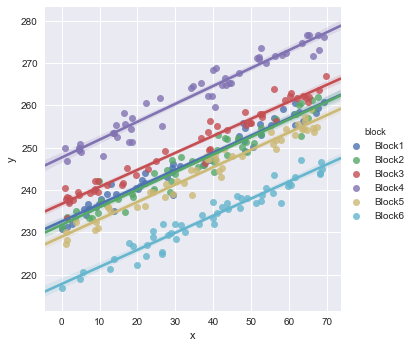

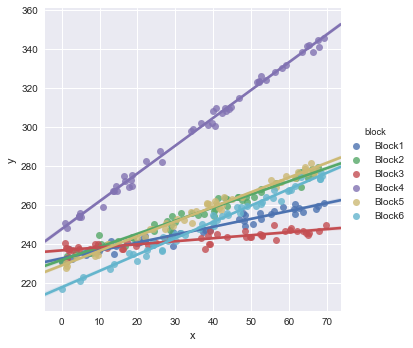

In [177]:
sns.lmplot(x='x', y='y', hue='block', data=data_hier_intercept)
sns.lmplot(x='x', y='y', hue='block', data=data_hier_intercept_slope)

## Randomized complete block
reference: http://www.flutterbys.com.au/stats/tut/tut9.3b.html

In [201]:
nTreat = 3
nBlock = 10
sigma = 5
sigma_block = 12
n = nBlock*nTreat

In [202]:
labels_block = ['Block0{}'.format(i+1) for i in range(nBlock)]
block = np.repeat(labels_block, repeats=1)
block

array(['Block01', 'Block02', 'Block03', 'Block04', 'Block05', 'Block06',
       'Block07', 'Block08', 'Block09', 'Block010'], dtype='<U8')

In [203]:
labels_A = ['A{}'.format(i+1) for i in range(nTreat)]
A = np.repeat(labels_A, repeats=1)
A

array(['A1', 'A2', 'A3'], dtype='<U2')

In [207]:
import itertools
dt = pd.DataFrame([row for row in itertools.product(labels_A, labels_block)], columns=['A', 'Block'])
dt.head()

,A,Block
0,A1,Block01
1,A1,Block02
2,A1,Block03
3,A1,Block04
4,A1,Block05


In [208]:
Xmat = patsy.dmatrix('-1 + Block + A', data=dt, return_type='dataframe')
Xmat.head()

,Block[Block01],Block[Block010],Block[Block02],Block[Block03],Block[Block04],Block[Block05],Block[Block06],Block[Block07],Block[Block08],Block[Block09],A[T.A2],A[T.A3]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
block_effects = np.random.normal(size=nBlock, loc=40, scale=sigma_block)
A_effects = np.array([30, 40]) # the average in A is 40, 70, 80. Here I set the difference, which is the effect size

all_effects = np.concatenate((block_effects, A_effects))

In [210]:
lin_pred = np.dot(Xmat, all_effects)
lin_pred

array([29.92013302, 57.47832864, 43.79964683,  8.03048873, 34.88285659,
       44.72545277, 37.26231171, 46.96396135, 28.32078898, 12.42152943,
       59.92013302, 87.47832864, 73.79964683, 38.03048873, 64.88285659,
       74.72545277, 67.26231171, 76.96396135, 58.32078898, 42.42152943,
       69.92013302, 97.47832864, 83.79964683, 48.03048873, 74.88285659,
       84.72545277, 77.26231171, 86.96396135, 68.32078898, 52.42152943])

In [211]:
# alternative
Xmat = pd.concat((patsy.dmatrix('-1 + Block', data=dt, return_type='dataframe'), 
    patsy.dmatrix('-1 + A', data=dt, return_type='dataframe')), 
    axis=1)

Xmat.head()

,Block[Block01],Block[Block010],Block[Block02],Block[Block03],Block[Block04],Block[Block05],Block[Block06],Block[Block07],Block[Block08],Block[Block09],A[A1],A[A2],A[A3]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [212]:
## Sum to zero block effects
block_effects = np.random.normal(size=nBlock, loc=0, scale=sigma_block)
A_effects = np.array([40, 70, 80])
all_effects = np.concatenate((block_effects, A_effects))
lin_pred = np.dot(Xmat, all_effects)
lin_pred

array([42.10201275, 37.80325616, 37.34765318, 42.39711466, 51.19265696,
       33.6385624 , 35.11311971, 41.9267799 , 38.55820029, 39.35819569,
       72.10201275, 67.80325616, 67.34765318, 72.39711466, 81.19265696,
       63.6385624 , 65.11311971, 71.9267799 , 68.55820029, 69.35819569,
       82.10201275, 77.80325616, 77.34765318, 82.39711466, 91.19265696,
       73.6385624 , 75.11311971, 81.9267799 , 78.55820029, 79.35819569])

In [213]:
## the quadrat observations (within sites) are drawn from
## normal distributions with means according to the site means
## and standard deviations of 5
y = np.random.normal(size=n, loc=lin_pred, scale=sigma)
dt['y'] = y

dt.head()

,A,Block,y
0,A1,Block01,44.030024
1,A1,Block02,41.394710
2,A1,Block03,43.803598
3,A1,Block04,41.814894
4,A1,Block05,39.806167


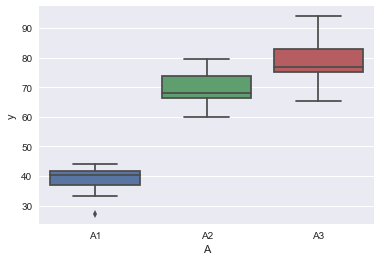

In [214]:
sns.boxplot(x='A', y='y', data=dt)

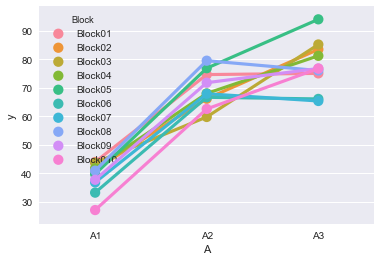

In [215]:
sns.pointplot(x='A', y='y', hue='Block', data=dt)

## Nested ANOVA
reference: http://www.flutterbys.com.au/stats/tut/tut9.2b.html

In [243]:
nTreat = 3
nSites = 15
nSitesPerTreat = nSites/nTreat
nQuads = 10
site_sigma = 12
sigma = 12
n = nSites*nQuads

In [244]:
labels_sites = ['S0{}'.format(i+1) for i in range(nSites)]
sites = np.repeat(labels_sites, repeats=nQuads)
sites

array(['S01', 'S01', 'S01', 'S01', 'S01', 'S01', 'S01', 'S01', 'S01',
       'S01', 'S02', 'S02', 'S02', 'S02', 'S02', 'S02', 'S02', 'S02',
       'S02', 'S02', 'S03', 'S03', 'S03', 'S03', 'S03', 'S03', 'S03',
       'S03', 'S03', 'S03', 'S04', 'S04', 'S04', 'S04', 'S04', 'S04',
       'S04', 'S04', 'S04', 'S04', 'S05', 'S05', 'S05', 'S05', 'S05',
       'S05', 'S05', 'S05', 'S05', 'S05', 'S06', 'S06', 'S06', 'S06',
       'S06', 'S06', 'S06', 'S06', 'S06', 'S06', 'S07', 'S07', 'S07',
       'S07', 'S07', 'S07', 'S07', 'S07', 'S07', 'S07', 'S08', 'S08',
       'S08', 'S08', 'S08', 'S08', 'S08', 'S08', 'S08', 'S08', 'S09',
       'S09', 'S09', 'S09', 'S09', 'S09', 'S09', 'S09', 'S09', 'S09',
       'S010', 'S010', 'S010', 'S010', 'S010', 'S010', 'S010', 'S010',
       'S010', 'S010', 'S011', 'S011', 'S011', 'S011', 'S011', 'S011',
       'S011', 'S011', 'S011', 'S011', 'S012', 'S012', 'S012', 'S012',
       'S012', 'S012', 'S012', 'S012', 'S012', 'S012', 'S013', 'S013',
       'S013', '

In [245]:
labels_A = ['A0{}'.format(i+1) for i in range(nTreat)]
A = np.repeat(labels_A, repeats=nSitesPerTreat*nQuads)
A

array(['A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01',
       'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01',
       'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01',
       'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01',
       'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01', 'A01',
       'A01', 'A01', 'A01', 'A01', 'A01', 'A02', 'A02', 'A02', 'A02',
       'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02',
       'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02',
       'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02',
       'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02',
       'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02', 'A02',
       'A02', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03',
       'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03',
       'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03', 'A03',
       'A03', 'A03',

In [246]:
A_means = np.array([40, 70, 80])

In [247]:
## the site means (treatment effects) are drawn from normal distributions
## with means of 40, 70 and 80 and standard deviations of 12
A_effects = np.random.normal(size=nSites, 
                             loc=np.repeat(A_means, nSitesPerTreat),
                             scale=site_sigma)
A_effects

array([10.02144743, 44.61231224, 24.27214521, 33.9915811 , 26.20332654,
       75.10747096, 62.48071066, 79.26543613, 75.72762876, 67.1191652 ,
       80.96672445, 91.0090372 , 75.53441701, 90.98742663, 79.76820792])

In [248]:
Xmat = patsy.dmatrix('sites - 1', data={'sites':sites}, return_type='dataframe')
lin_pred = np.dot(Xmat, A_effects)

In [249]:
lin_pred

array([10.02144743, 10.02144743, 10.02144743, 10.02144743, 10.02144743,
       10.02144743, 10.02144743, 10.02144743, 10.02144743, 10.02144743,
       79.26543613, 79.26543613, 79.26543613, 79.26543613, 79.26543613,
       79.26543613, 79.26543613, 79.26543613, 79.26543613, 79.26543613,
       75.72762876, 75.72762876, 75.72762876, 75.72762876, 75.72762876,
       75.72762876, 75.72762876, 75.72762876, 75.72762876, 75.72762876,
       67.1191652 , 67.1191652 , 67.1191652 , 67.1191652 , 67.1191652 ,
       67.1191652 , 67.1191652 , 67.1191652 , 67.1191652 , 67.1191652 ,
       80.96672445, 80.96672445, 80.96672445, 80.96672445, 80.96672445,
       80.96672445, 80.96672445, 80.96672445, 80.96672445, 80.96672445,
       91.0090372 , 91.0090372 , 91.0090372 , 91.0090372 , 91.0090372 ,
       91.0090372 , 91.0090372 , 91.0090372 , 91.0090372 , 91.0090372 ,
       75.53441701, 75.53441701, 75.53441701, 75.53441701, 75.53441701,
       75.53441701, 75.53441701, 75.53441701, 75.53441701, 75.53

In [250]:
y = np.random.normal(size=n, loc=lin_pred, scale=sigma)
data_nest = pd.DataFrame({'y':y, 'A':A, 'Sites':sites, 'Quads': np.arange(y.shape[0])+1})

In [251]:
data_nest.head(15)

,A,Quads,Sites,y
0,A01,1,S01,13.254217
1,A01,2,S01,19.612338
2,A01,3,S01,25.999838
3,A01,4,S01,16.271194
4,A01,5,S01,10.721910
5,A01,6,S01,18.669679
6,A01,7,S01,-8.523924
7,A01,8,S01,29.688987
8,A01,9,S01,-5.884448
9,A01,10,S01,20.865961


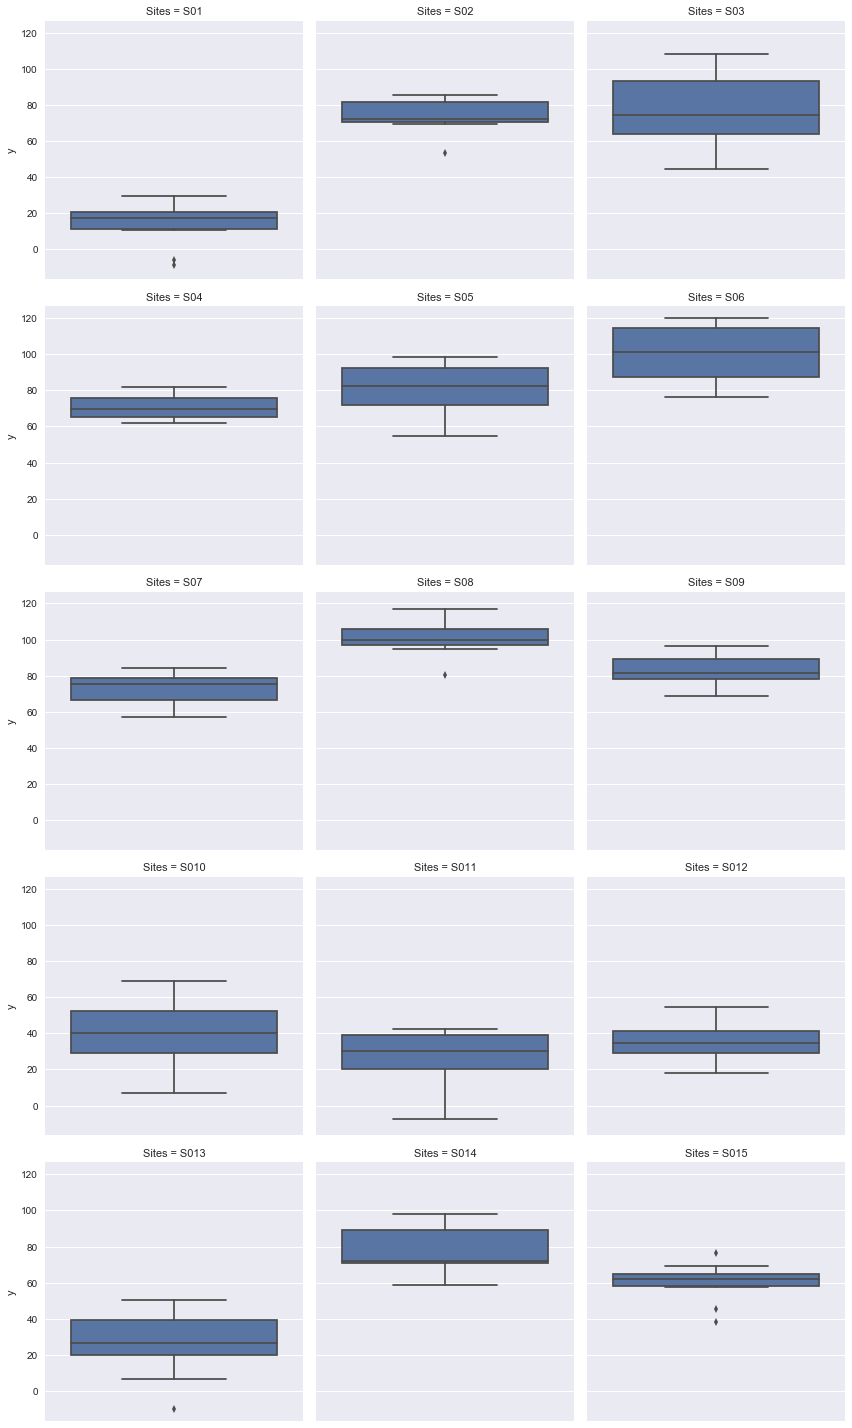

In [252]:
sns.factorplot(y='y', col='Sites', data=data_nest, kind='box', col_wrap=3)